# Web Scraping


## 1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it. I look at used cars below.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/jwa#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

#####*fields/data to gather*

- I want to look at price and location variables to learn more about jewelry data
- I can make a kernel density plot to analyze relationships between the price of a jewelry piece and its type

## 2. Get your search results of interest and extract data from them, using code similar to what's below.

In [54]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [60]:
import re # Regular expressions

types  = ['necklace', 'watch','ring','bracelet','earring','box','pendant','broach']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    location = listings[k].find('div',class_='location')
    if location is None:
      location = 'missing'
    else: location = location.get_text().lower()
    link = listings[k].find(href=True)['href']
    words = title.split()
    hits = [word for word in words if word in types]
    if len(hits) == 0:
        jewelry_types = 'missing'
    else:
        jewelry_types = hits[0]

    #
    data.append({'title':title, 'price':price, 'location':location, 'type':jewelry_types, 'link':link})

## 3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.

In [61]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['location'] = df['location'].str.replace('\n','')
print(df.shape)
df.to_csv('craigslist_cville_jewelry.csv') # Save data in case of a disaster
df.head()

(23, 5)


,title,price,location,type,link
0,vintage jewelry,1,crozet ...,missing,https://charlottesville.craigslist.org/jwl/d/g...
1,"> ladies ring - amethyst, diamonds & 10k gold,...",0,charlottesville ...,ring,https://charlottesville.craigslist.org/jwl/d/c...
2,musical jewelry box,10,louisa ...,box,https://charlottesville.craigslist.org/jwl/d/t...
3,jewelry,1,missing,missing,https://charlottesville.craigslist.org/jwl/d/t...
4,2 pair ear rings,5,missing,missing,https://charlottesville.craigslist.org/jwl/d/t...


count      23.000000
mean       98.217391
std       262.566521
min         0.000000
25%         5.000000
50%        15.000000
75%        37.500000
max      1200.000000
Name: price, dtype: float64


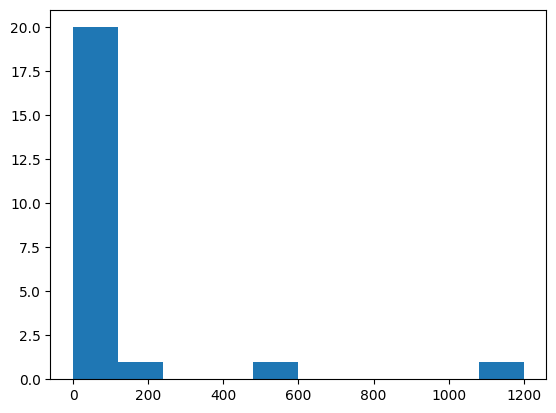

count                                                    23
unique                                                   11
top                               charlottesville       ...
freq                                                      7
Name: location, dtype: object


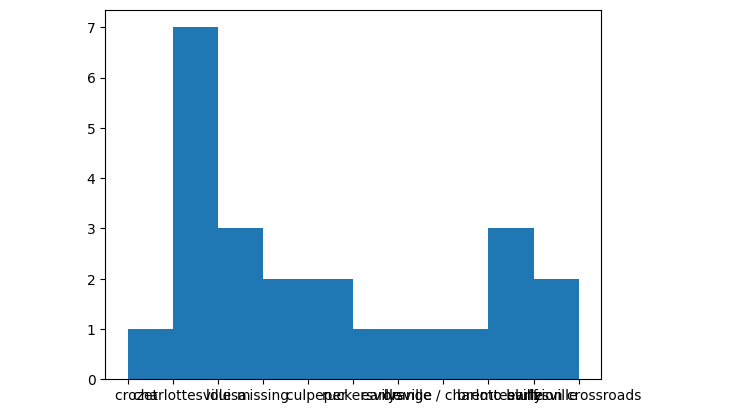

In [62]:
# EDA for price and location:

#price
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

#location
print(df['location'].describe())
df['location'].hist(grid=False)
plt.show()

In [63]:
# Price by location:
df.loc[:,['price','location']].groupby('location').describe()

price              \
                                                   count        mean   
location                                                               
                        bremo bluff            ...   3.0   10.000000   
                        charlottesville        ...   7.0  109.428571   
                        crozet                       1.0    1.000000   
                        culpeper               ...   2.0  600.500000   
                        earlysville            ...   1.0   35.000000   
                        earlysville / charlotte...   1.0   15.000000   
                        louisa                       3.0   10.000000   
                        orange                       1.0   30.000000   
                        ruckersville           ...   1.0   45.000000   
                        zion crossroads        ...   1.0  100.000000   
missing                                              2.0    3.000000   

                                                                               \
                                                           std    min     25%   
location                                                                        
                        bremo bluff            ...    5.000000    5.0    7.50   
                        charlottesville        ...  182.438900    0.0   10.50   
                        crozet                             NaN    1.0    1.00   
                        culpeper               ...  847.821031    1.0  300.75   
                        earlysville            ...         NaN   35.0   35.00   
                        earlysville / charlotte...         NaN   15.0   15.00   
                        louisa                        0.000000   10.0   10.00   
                        orange                             NaN   30.0   30.00   
                        ruckersville           ...         NaN   45.0   45.00   
                        zion crossroads        ...         NaN  100.0  100.00   
missing                                               2.828427    1.0    2.00   

                                                                           
                                                      50%     75%     max  
location                                                                   
                        bremo bluff            ...   10.0   12.50    15.0  
                        charlottesville        ...   30.0  107.50   500.0  
                        crozet                        1.0    1.00     1.0  
                        culpeper               ...  600.5  900.25  1200.0  
                        earlysville            ...   35.0   35.00    35.0  
                        earlysville / charlotte...   15.0   15.00    15.0  
                        louisa                       10.0   10.00    10.0  
                        orange                       30.0   30.00    30.0  
                        ruckersville           ...   45.0   45.00    45.0  
                        zion crossroads        ...  100.0  100.00   100.0  
missing                                               3.0    4.00     5.0

<Axes: xlabel='price', ylabel='Density'>

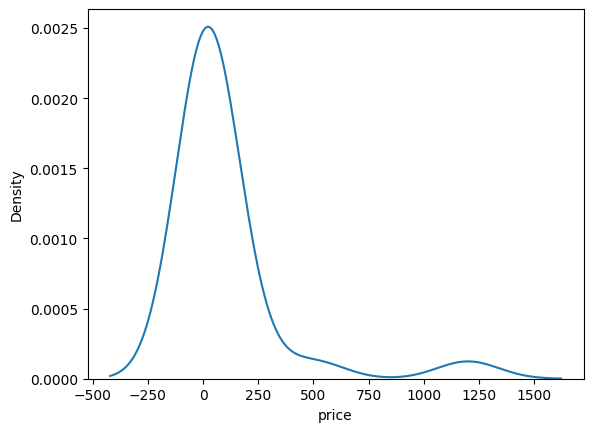

In [66]:
#kernel density plot, price

sns.kdeplot(data=df,x='price')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-67-c1c01377b575>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='price', hue = 'type')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

<Axes: xlabel='price', ylabel='Density'>

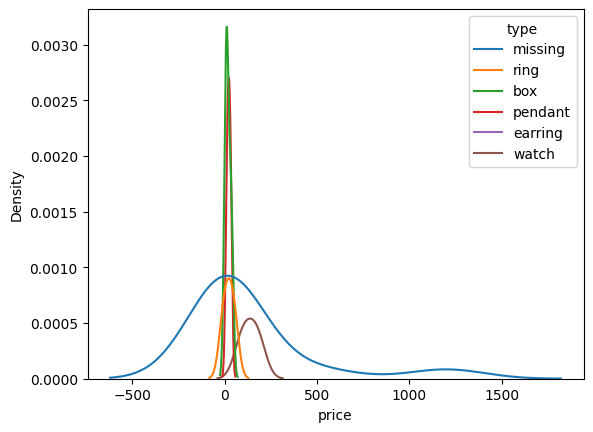

In [67]:
#kernel density plot, price, hued

sns.kdeplot(data=df,x='price', hue = 'type')